# Imports

In [84]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report

In [98]:
%matplotlib inline
pyplot.rcParams['figure.figsize']=(20,15)

In [3]:
data=pandas.read_csv('./Crop_recommendation.csv')

N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:xlabel='label'>

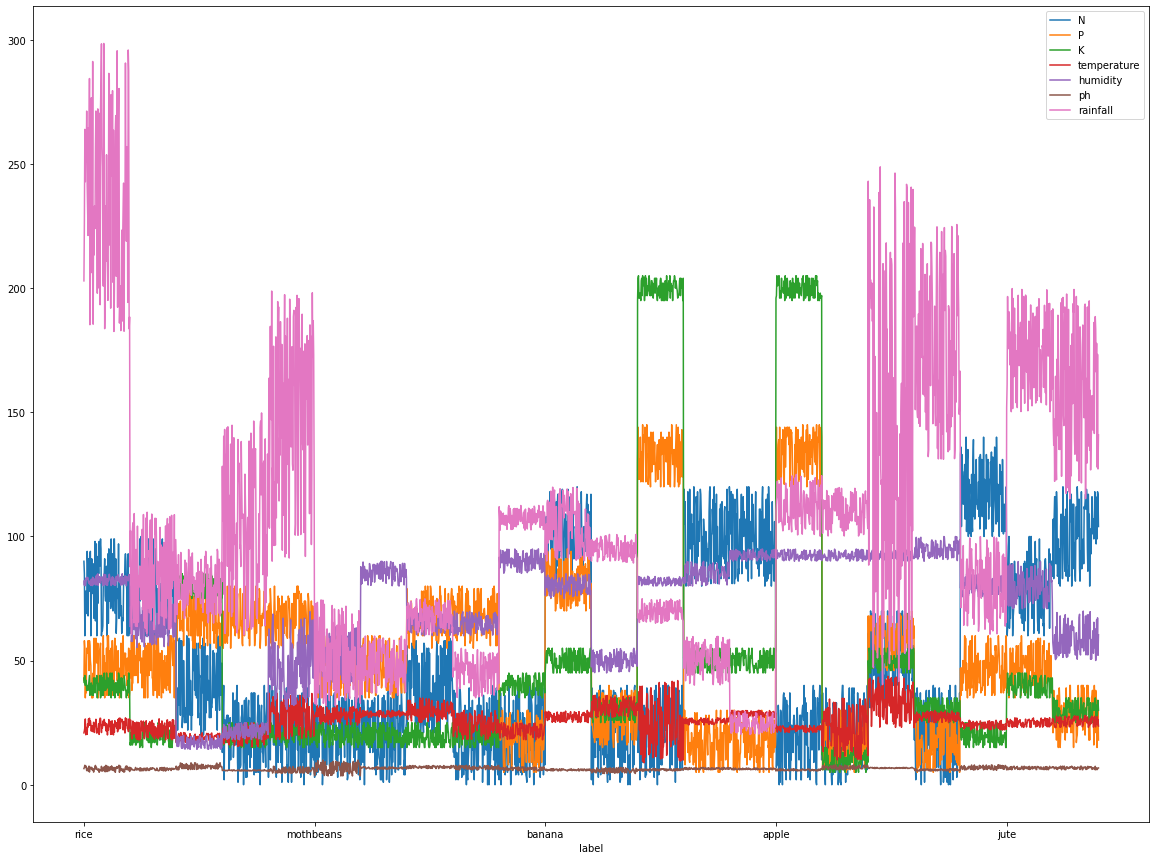

In [22]:
data.plot(kind='line',x='label',y=['N','P','K','temperature','humidity','ph','rainfall'])

In [26]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [27]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Data Reduction

Dimension Reduction (column level)

DataPoints Reduction (Row Leval)

In [28]:
data=data.drop(['N',"P","K","ph"],axis=1)

In [29]:
data

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice
...,...,...,...,...
2195,26.774637,66.413269,177.774507,coffee
2196,27.417112,56.636362,127.924610,coffee
2197,24.131797,67.225123,173.322839,coffee
2198,26.272418,52.127394,127.175293,coffee


In [39]:
classes_list=["rice","maize","cotton","coconut","orange","apple","watermelon","jute","mango","coffee",]
def get_class_number(class_name):
    if class_name=='rice':
        return 0
    elif class_name=='maize':
        return 1
    elif class_name=='cotton':
        return 2
    elif class_name=='coconut':
        return 3
    elif class_name=='orange':
        return 4
    elif class_name=='apple':
        return 5
    elif class_name=='watermelon':
        return 6
    elif class_name=='jute':
        return 7
    elif class_name=='mango':
        return 8
    elif class_name=='coffee':
        return 9

In [34]:
Analysis_data=data[data['label']=='rice']
for i in range(1,len(classes_list)):
    Analysis_data=pandas.concat([Analysis_data,data[data['label']==classes_list[i]]])

In [36]:
data=Analysis_data

In [38]:
data

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice
...,...,...,...,...
2195,26.774637,66.413269,177.774507,coffee
2196,27.417112,56.636362,127.924610,coffee
2197,24.131797,67.225123,173.322839,coffee
2198,26.272418,52.127394,127.175293,coffee


In [37]:
data['label'].value_counts()

rice          100
maize         100
cotton        100
coconut       100
orange        100
apple         100
watermelon    100
jute          100
mango         100
coffee        100
Name: label, dtype: int64

# Data Visualization

In [40]:
data['class_number']=data['label'].apply(get_class_number)

In [41]:
data

,temperature,humidity,rainfall,label,class_number
0,20.879744,82.002744,202.935536,rice,0
1,21.770462,80.319644,226.655537,rice,0
2,23.004459,82.320763,263.964248,rice,0
3,26.491096,80.158363,242.864034,rice,0
4,20.130175,81.604873,262.717340,rice,0
...,...,...,...,...,...
2195,26.774637,66.413269,177.774507,coffee,9
2196,27.417112,56.636362,127.924610,coffee,9
2197,24.131797,67.225123,173.322839,coffee,9
2198,26.272418,52.127394,127.175293,coffee,9


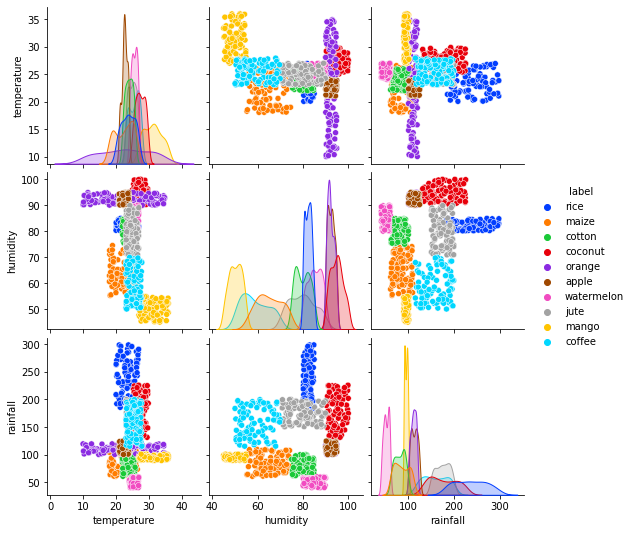

In [47]:
seaborn.pairplot(data.iloc[:,:4],hue='label',palette='bright')

<AxesSubplot:>

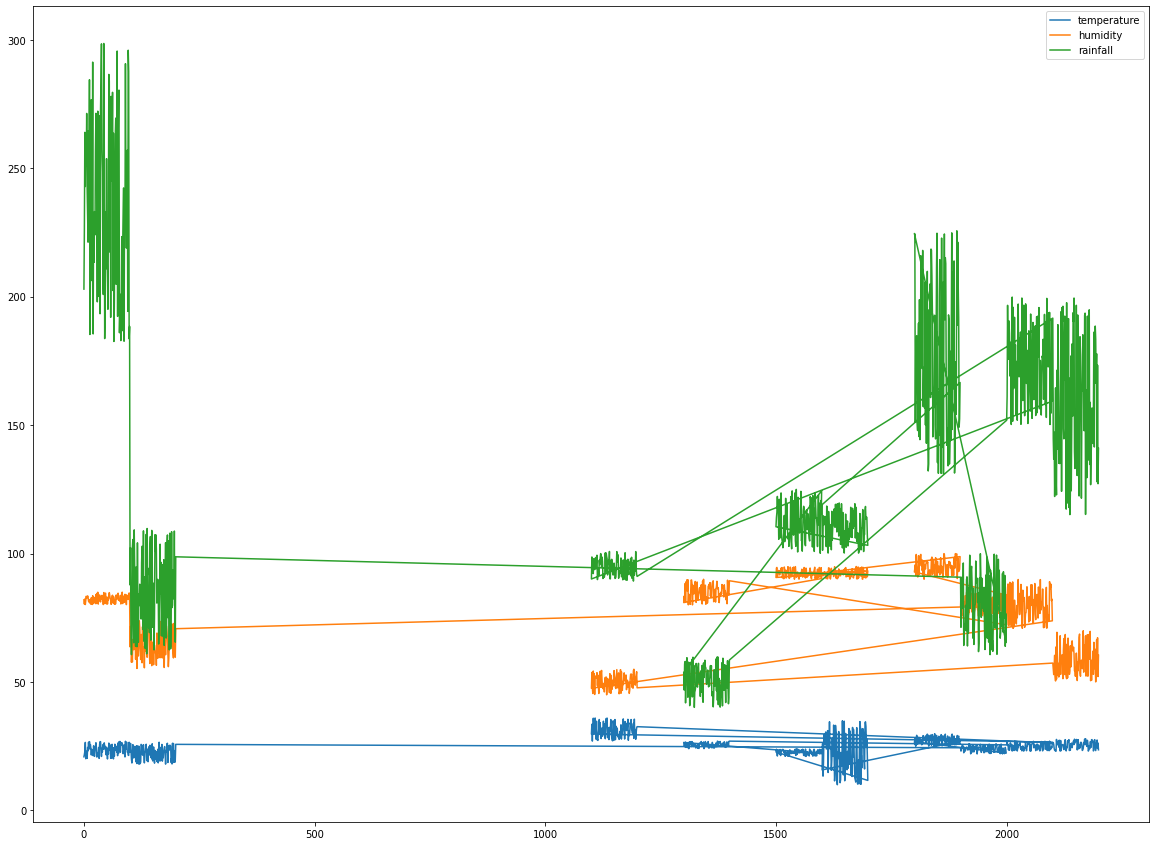

In [49]:
data.iloc[:,:4].plot()

In [50]:
data['sr_no']=[i for i in range(1,len(data)+1)]

In [51]:
data

,temperature,humidity,rainfall,label,class_number,sr_no
0,20.879744,82.002744,202.935536,rice,0,1
1,21.770462,80.319644,226.655537,rice,0,2
2,23.004459,82.320763,263.964248,rice,0,3
3,26.491096,80.158363,242.864034,rice,0,4
4,20.130175,81.604873,262.717340,rice,0,5
...,...,...,...,...,...,...
2195,26.774637,66.413269,177.774507,coffee,9,996
2196,27.417112,56.636362,127.924610,coffee,9,997
2197,24.131797,67.225123,173.322839,coffee,9,998
2198,26.272418,52.127394,127.175293,coffee,9,999


<AxesSubplot:xlabel='sr_no'>

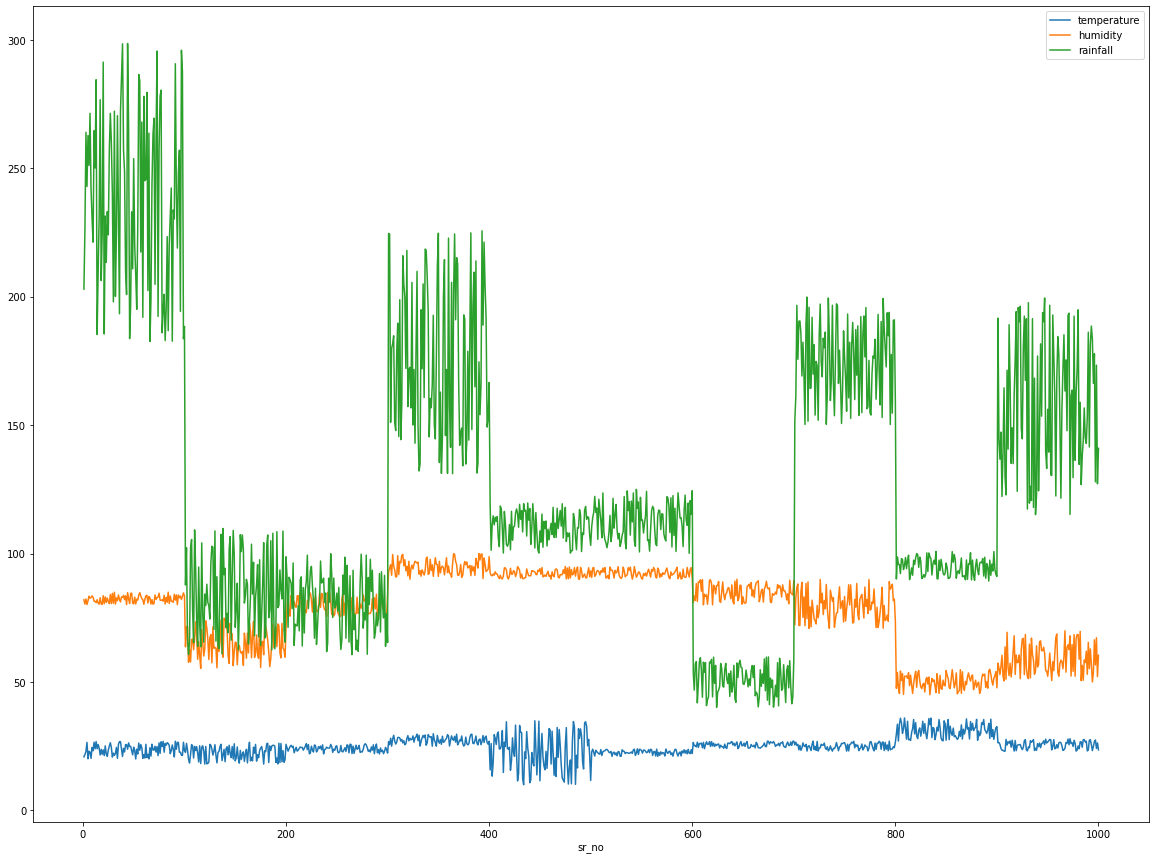

In [55]:
data.plot(kind='line',x='sr_no',y=['temperature','humidity','rainfall'])

## 3D Visualization

Text(0.5, 0, 'rainfall')

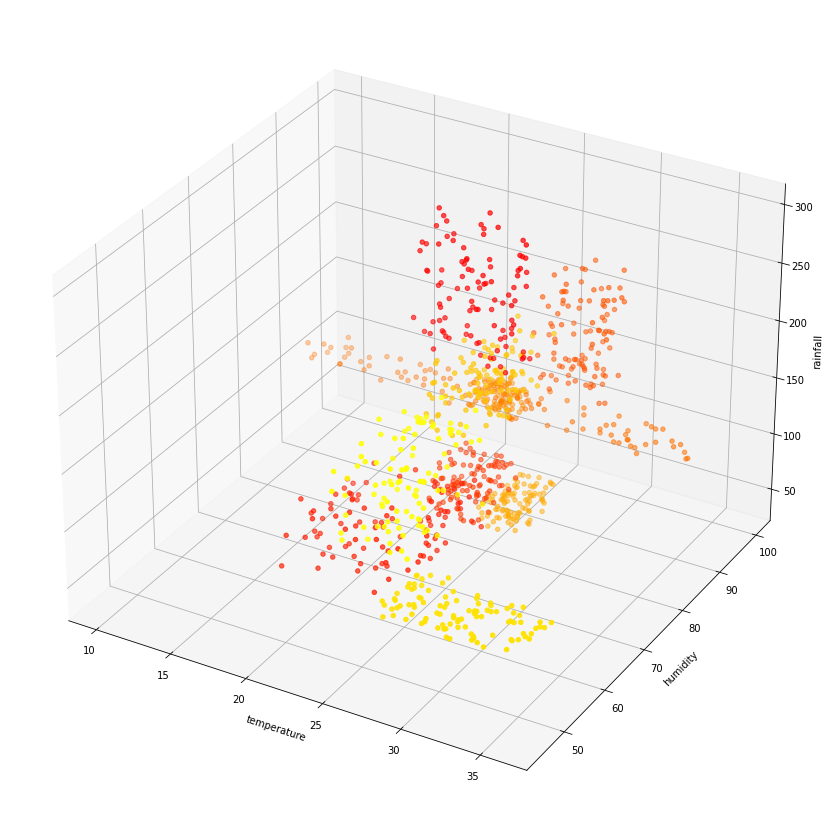

In [61]:
plotter=pyplot.subplot(projection='3d')
plotter.scatter3D(data.to_numpy()[:,0],data.to_numpy()[:,1],data.to_numpy()[:,2],c=data['class_number'],cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

# Creating Training data

In [67]:
Shuffled_data=data.sample(frac=1)

In [68]:
Shuffled_data

,temperature,humidity,rainfall,label,class_number,sr_no
1986,22.084583,82.829041,67.064598,cotton,2,287
148,25.952633,61.890822,99.579812,maize,1,149
1599,22.169395,90.271856,124.468311,apple,5,600
2155,27.564418,54.410941,177.816092,coffee,9,956
123,18.833445,58.750820,79.753290,maize,1,124
...,...,...,...,...,...,...
1823,27.638349,95.487634,205.546311,coconut,3,324
1661,30.848350,92.867737,107.414268,orange,4,462
1171,32.269353,53.560928,95.940354,mango,8,872
2074,26.583610,78.007748,154.823886,jute,7,775


In [69]:
Training_data=Shuffled_data[:850]
Testing_data=Shuffled_data[850:]

In [70]:
Training_data['label'].value_counts()

apple         90
jute          88
cotton        86
coffee        86
maize         85
rice          85
coconut       84
orange        83
mango         82
watermelon    81
Name: label, dtype: int64

In [71]:
Testing_data['label'].value_counts()

watermelon    19
mango         18
orange        17
coconut       16
maize         15
rice          15
coffee        14
cotton        14
jute          12
apple         10
Name: label, dtype: int64

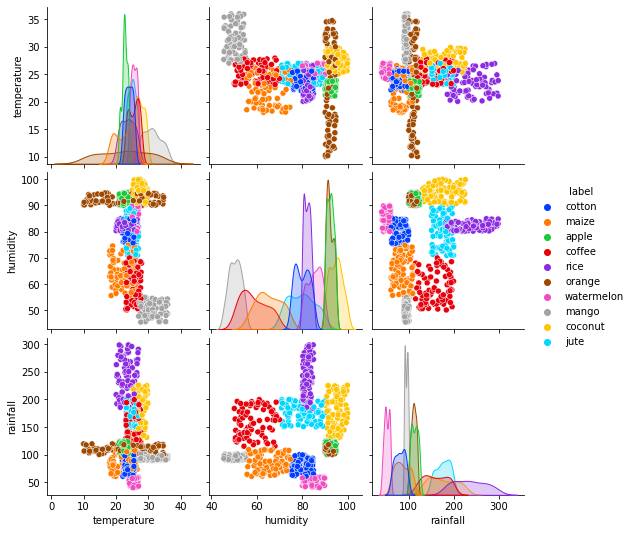

In [72]:
seaborn.pairplot(Training_data.iloc[:,:4],hue='label',palette='bright')

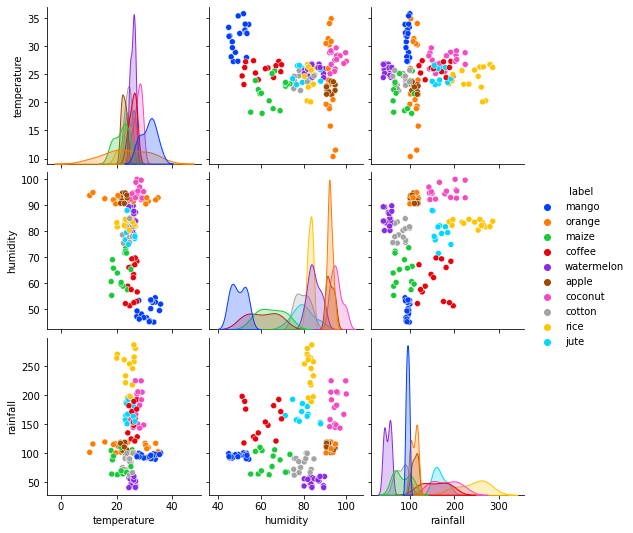

In [73]:
seaborn.pairplot(Testing_data.iloc[:,:4],hue='label',palette='bright')

Text(0.5, 0, 'rainfall')

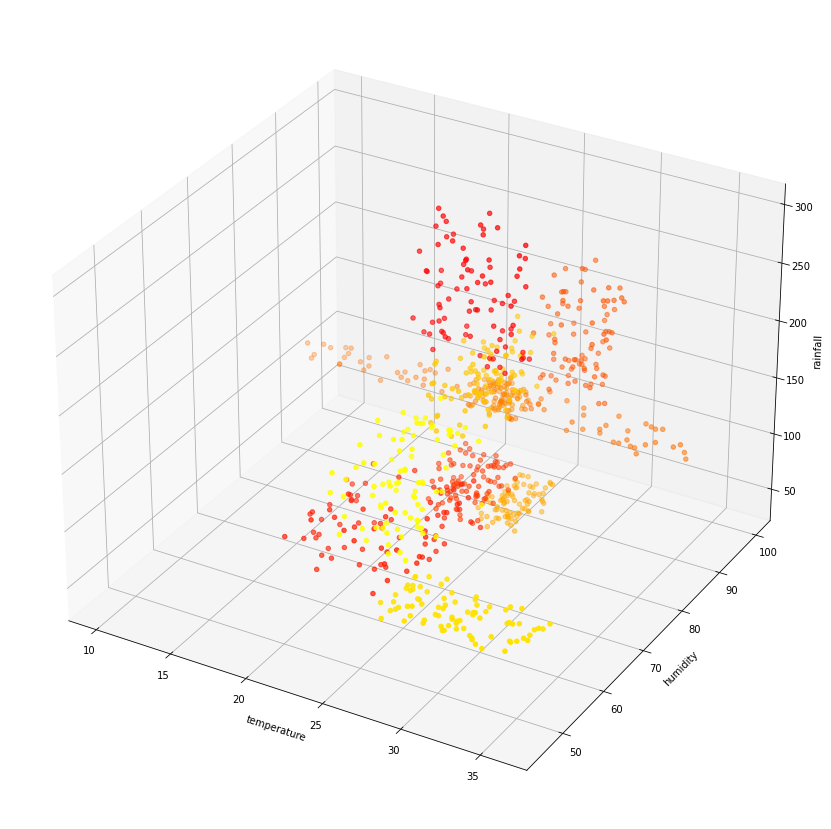

In [75]:
plotter=pyplot.subplot(projection='3d')
plotter.scatter3D(Training_data.to_numpy()[:,0],Training_data.to_numpy()[:,1],Training_data.to_numpy()[:,2],c=Training_data['class_number'],cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

Text(0.5, 0, 'rainfall')

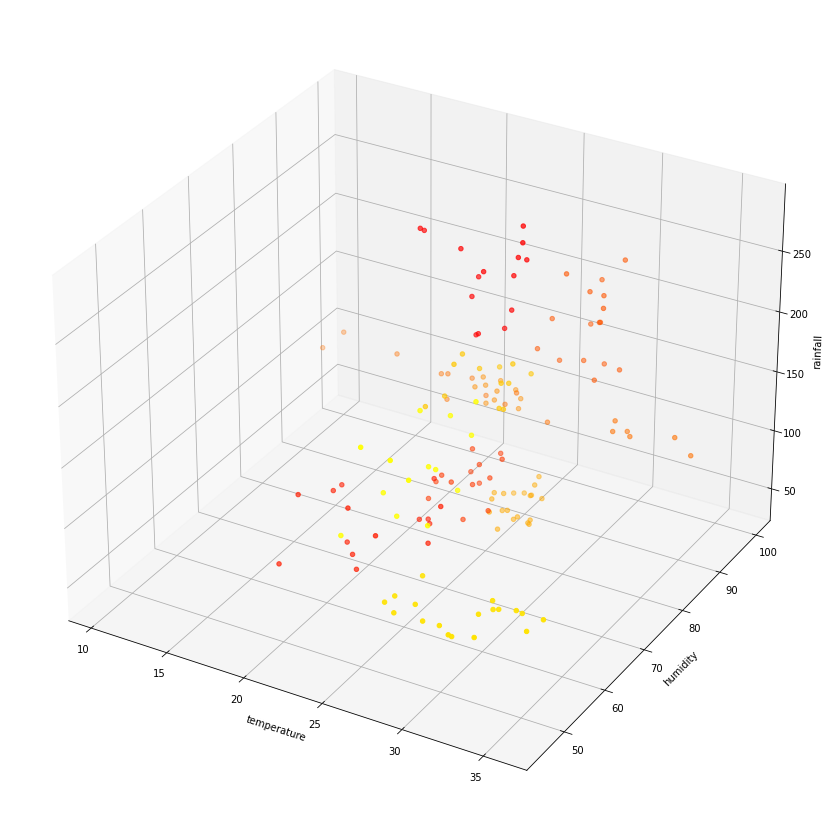

In [74]:
plotter=pyplot.subplot(projection='3d')
plotter.scatter3D(Testing_data.to_numpy()[:,0],Testing_data.to_numpy()[:,1],Testing_data.to_numpy()[:,2],c=Testing_data['class_number'],cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

# taking features and Labels

In [77]:
training_Labels=Training_data['label']
training_class_numbers=Training_data['class_number']
training_Features=Training_data.drop(['label','sr_no','class_number'],axis=1)

In [78]:
training_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1986 to 1662
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  850 non-null    float64
 1   humidity     850 non-null    float64
 2   rainfall     850 non-null    float64
dtypes: float64(3)
memory usage: 26.6 KB


In [79]:
training_Labels.value_counts()

apple         90
jute          88
cotton        86
coffee        86
maize         85
rice          85
coconut       84
orange        83
mango         82
watermelon    81
Name: label, dtype: int64

In [83]:
testing_Labels=Testing_data['label']
testing_class_numbers=Testing_data['class_number']
testing_Features=Testing_data.drop(['label','sr_no','class_number'],axis=1)

In [82]:
testing_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1121 to 2111
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  150 non-null    float64
 1   humidity     150 non-null    float64
 2   rainfall     150 non-null    float64
dtypes: float64(3)
memory usage: 4.7 KB


# Model Selection

In [143]:
model=svm.SVC(kernel='linear')

In [144]:
model

SVC(kernel='linear')

In [145]:
model.fit(training_Features,training_Labels)

SVC(kernel='linear')

In [146]:
model.support_vectors_

array([[ 22.16939473,  90.27185592, 124.4683112 ],
       [ 21.22503442,  90.09877774, 113.9760462 ],
       [ 21.42177231,  92.62665309, 102.8045658 ],
       [ 22.71271308,  90.45261746, 109.8852597 ],
       [ 22.35548159,  94.47811755, 116.7366261 ],
       [ 22.9215706 ,  94.89613443, 105.6941544 ],
       [ 23.34467359,  90.37981478, 112.8954016 ],
       [ 21.18667419,  91.13435689, 122.233323  ],
       [ 21.19909519,  90.80819418, 103.6838922 ],
       [ 22.45696744,  94.76285385, 114.8407725 ],
       [ 23.59997268,  90.97597665, 107.1728191 ],
       [ 23.76121837,  93.661643  , 100.825956  ],
       [ 22.42776057,  93.91722423, 102.7230739 ],
       [ 22.03911546,  94.58075845, 110.9804014 ],
       [ 22.52709326,  92.54780429, 115.3830068 ],
       [ 22.85267372,  94.5764581 , 117.5314026 ],
       [ 23.06204373,  92.39544055, 114.7399101 ],
       [ 21.25941052,  92.84416234, 109.0658471 ],
       [ 23.15791104,  90.34396882, 110.712841  ],
       [ 23.1094265 ,  92.79630

In [147]:
model.n_support_

array([80,  6,  4,  8, 26, 10,  6, 80, 21,  3])

In [148]:
len(model.support_vectors_)

244

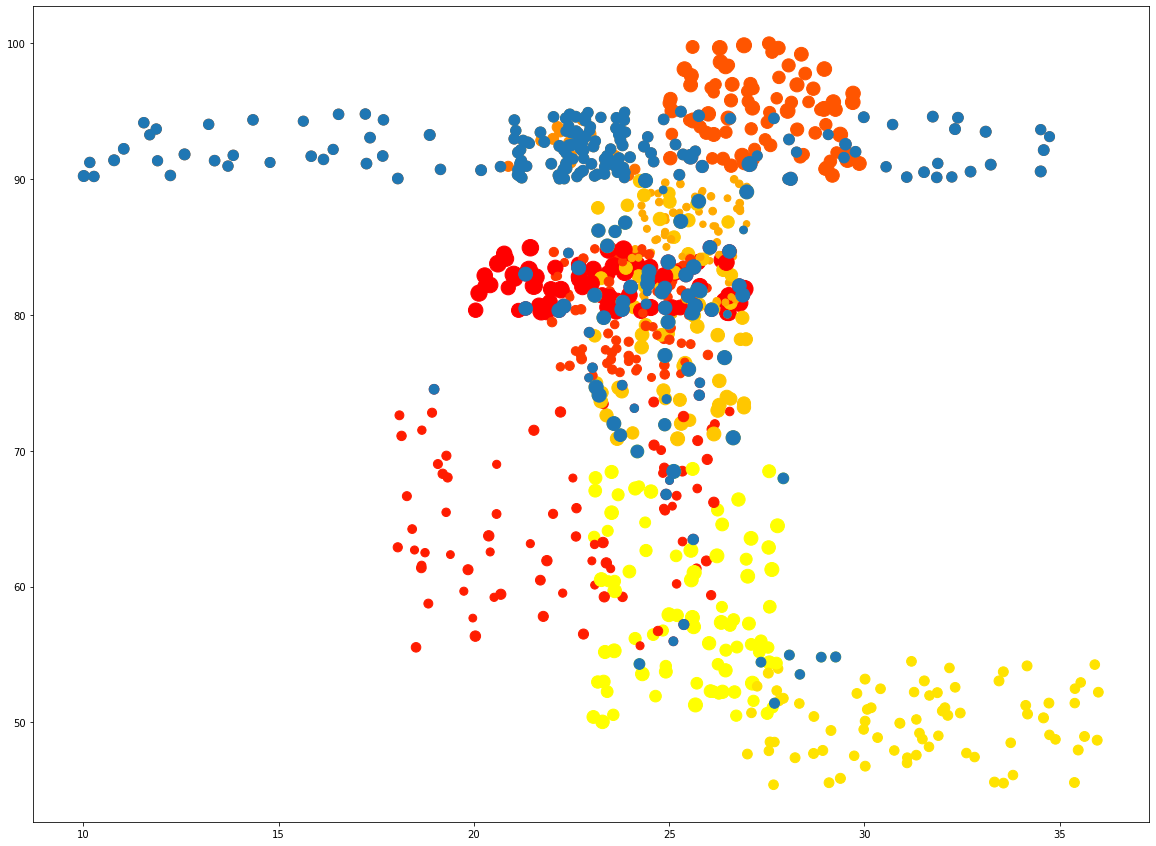

In [149]:
pyplot.scatter(training_Features.to_numpy()[:,0],training_Features.to_numpy()[:,1],training_Features.to_numpy()[:,2],c=training_class_numbers,cmap='autumn')
pyplot.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],model.support_vectors_[:,2])

Text(0.5, 0, 'rainfall')

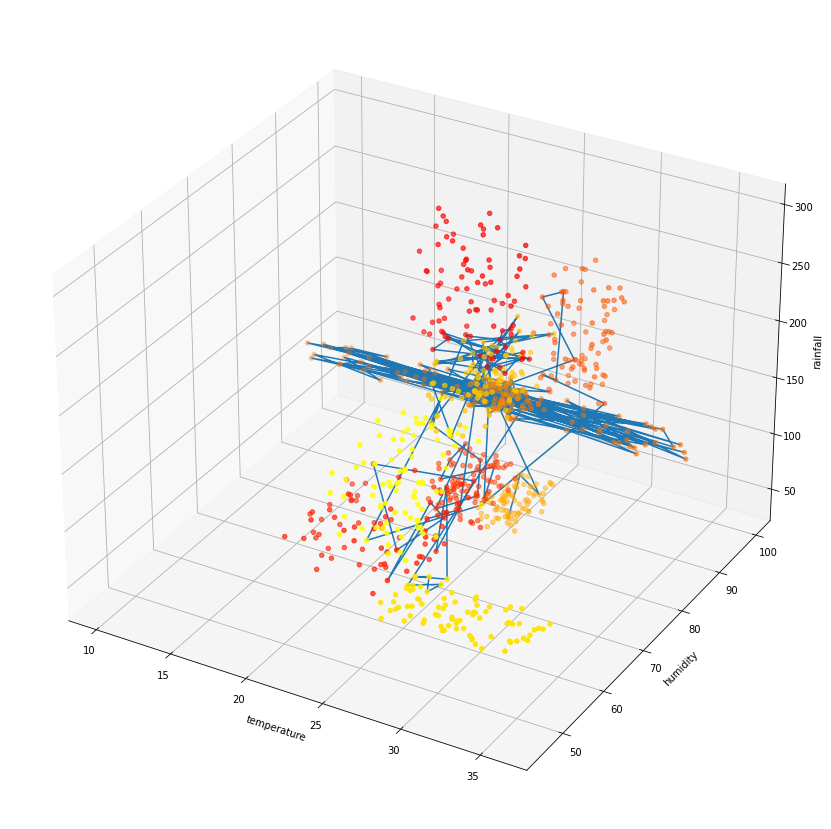

In [150]:
plotter=pyplot.subplot(projection='3d')
plotter.scatter3D(training_Features.to_numpy()[:,0],training_Features.to_numpy()[:,1],training_Features.to_numpy()[:,2],c=training_class_numbers,cmap='autumn')
plotter.plot3D(model.support_vectors_[:,0],model.support_vectors_[:,1],model.support_vectors_[:,2])
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

              precision    recall  f1-score   support

       apple       0.55      0.52      0.54        90
     coconut       0.99      1.00      0.99        84
      coffee       1.00      1.00      1.00        86
      cotton       1.00      1.00      1.00        86
        jute       0.86      0.94      0.90        88
       maize       1.00      1.00      1.00        85
       mango       1.00      1.00      1.00        82
      orange       0.51      0.54      0.53        83
        rice       0.95      0.85      0.89        85
  watermelon       1.00      1.00      1.00        81

    accuracy                           0.88       850
   macro avg       0.89      0.89      0.89       850
weighted avg       0.88      0.88      0.88       850



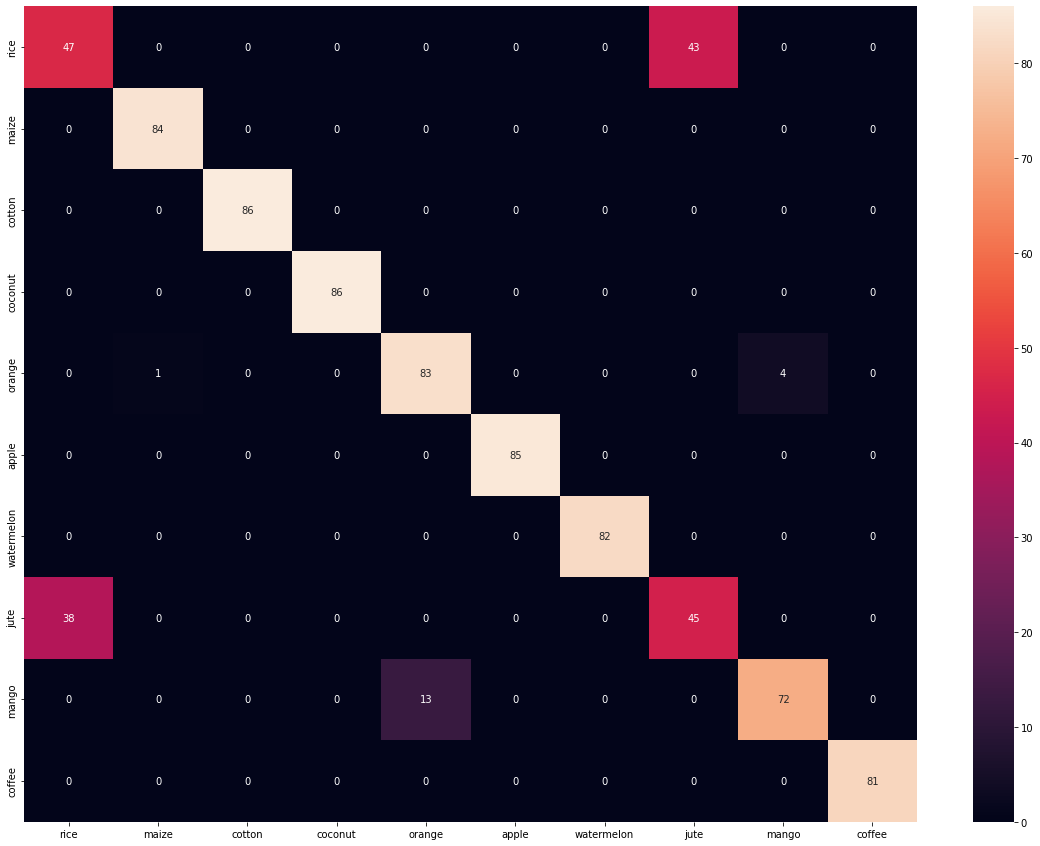

In [151]:
training_prterdicted_values=model.predict(training_Features)
seaborn.heatmap(confusion_matrix(training_Labels,training_prterdicted_values),annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(training_Labels,training_prterdicted_values))

              precision    recall  f1-score   support

       apple       0.43      0.60      0.50        10
     coconut       1.00      1.00      1.00        16
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        12
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        18
      orange       0.69      0.53      0.60        17
        rice       1.00      0.93      0.97        15
  watermelon       1.00      1.00      1.00        19

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.90       150
weighted avg       0.92      0.91      0.91       150



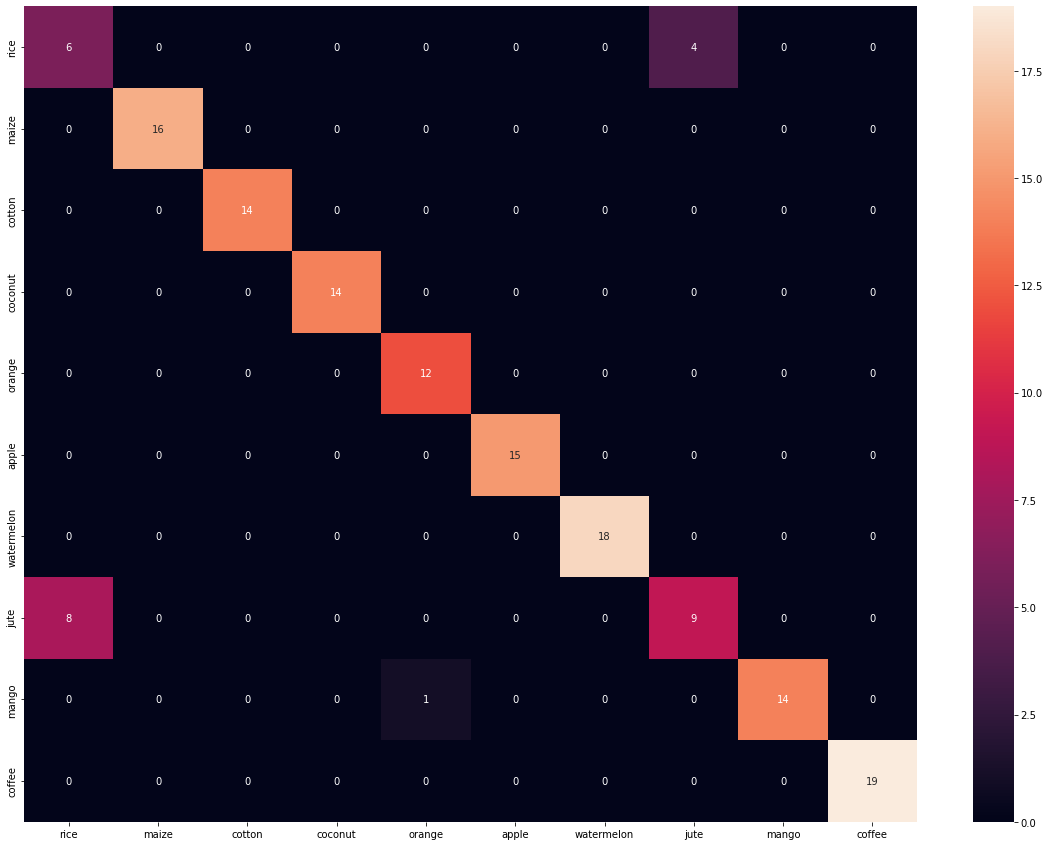

In [152]:
testing_predicted_values=model.predict(testing_Features)
seaborn.heatmap(confusion_matrix(testing_Labels,testing_predicted_values),annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(testing_Labels,testing_predicted_values))

In [141]:
predicted_values=list(testing_predicted_values)
testing_Labels=list(testing_Labels)
print("Actual values --> Predicted Values")
for i in range(len(predicted_values)):
    print("   ",testing_Labels[i]," --> ",predicted_values[i])

Actual values --> Predicted Values
    mango  -->  mango
    orange  -->  orange
    maize  -->  cotton
    coffee  -->  coffee
    watermelon  -->  watermelon
    orange  -->  orange
    apple  -->  apple
    watermelon  -->  watermelon
    mango  -->  mango
    coconut  -->  coconut
    coffee  -->  coffee
    maize  -->  maize
    cotton  -->  cotton
    apple  -->  apple
    rice  -->  rice
    watermelon  -->  watermelon
    jute  -->  jute
    rice  -->  jute
    orange  -->  apple
    maize  -->  maize
    cotton  -->  cotton
    orange  -->  orange
    orange  -->  apple
    maize  -->  maize
    rice  -->  rice
    mango  -->  mango
    cotton  -->  cotton
    cotton  -->  cotton
    cotton  -->  cotton
    mango  -->  mango
    rice  -->  rice
    orange  -->  apple
    cotton  -->  cotton
    mango  -->  mango
    mango  -->  mango
    maize  -->  maize
    orange  -->  apple
    watermelon  -->  watermelon
    jute  -->  jute
    coffee  -->  coffee
    watermelon  -->  wat

# Testing on new Data
for

1) temprature=30

2) humidity=49

3) rainfall=95

In [142]:
new_data=[30,49,95]
print(model.predict([new_data])[0])

mango
